# **Decision Tree - Assignment**

## **Theoretical Questions & Answers**  

### **1. What is a Decision Tree, and how does it work?**  
A Decision Tree is a **supervised learning algorithm** used for both **classification and regression**. It works by **splitting data** into branches based on feature values until it reaches a decision.  

### **2. What are impurity measures in Decision Trees?**  
Impurity measures determine how well a node separates data. The two common measures are:  
- **Gini Impurity**  
- **Entropy**  

### **3. What is the mathematical formula for Gini Impurity?**  
\[
Gini = 1 - \sum p_i^2
\]  
where \( p_i \) is the probability of a class at that node.  

### **4. What is the mathematical formula for Entropy?**  
\[
Entropy = - \sum p_i \log_2(p_i)
\]  
It measures the **uncertainty** in a dataset.  

### **5. What is Information Gain, and how is it used in Decision Trees?**  
Information Gain measures how much **entropy decreases** after a split. A higher Information Gain means a better split.  

\[
IG = Entropy(Parent) - \sum \left(\frac{|Child|}{|Parent|} \times Entropy(Child) \right)
\]  

### **6. What is the difference between Gini Impurity and Entropy?**  
- **Gini Impurity**: Faster to compute, preferred by default in sklearn.  
- **Entropy**: More precise but computationally expensive.  

### **7. What is the mathematical explanation behind Decision Trees?**  
Decision Trees use **recursive binary splitting**, where at each step, the algorithm selects the best **feature** and **threshold** to split data, aiming to minimize impurity.  

### **8. What is Pre-Pruning in Decision Trees?**  
Pre-Pruning **limits tree growth** using constraints like **max_depth, min_samples_split**, reducing overfitting.  

### **9. What is Post-Pruning in Decision Trees?**  
Post-Pruning **first grows a full tree** and then **removes weak branches** using **Cost Complexity Pruning (CCP)**.  

### **10. What is the difference between Pre-Pruning and Post-Pruning?**  
- **Pre-Pruning**: Stops tree early, before growing too large.  
- **Post-Pruning**: Grows full tree first, then prunes unnecessary parts.  

### **11. What is a Decision Tree Regressor?**  
A Decision Tree Regressor predicts **continuous values** instead of classes. It splits data by minimizing **Mean Squared Error (MSE)**.  

### **12. What are the advantages and disadvantages of Decision Trees?**  
- **Advantages**: Simple, interpretable, handles both numerical & categorical data.  
- **Disadvantages**: Prone to overfitting, sensitive to noisy data.  

### **13. How does a Decision Tree handle missing values?**  
- Uses **surrogate splits** to replace missing values.  
- Can **ignore missing values** in some cases.  

### **14. How does a Decision Tree handle categorical features?**  
- Converts categorical features into **one-hot encoding**.  
- Uses **label encoding** for ordinal data.  

### **15. What are some real-world applications of Decision Trees?**  
- **Medical Diagnosis**  
- **Credit Risk Prediction**  
- **Fraud Detection**  

---

# **Practical Implementation - Decision Tree**


In [ ]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix
from sklearn.datasets import load_iris

In [ ]:
# 16. Write a Python program to train a Decision Tree Classifier on the Iris dataset and print the model accuracy
from sklearn.datasets import load_iris
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("16. Model Accuracy:", accuracy_score(y_test, y_pred))

16. Model Accuracy: 1.0


In [ ]:
# 17. Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the feature importances
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X_train, y_train)
print("17. Feature Importances:", clf_gini.feature_importances_)

17. Feature Importances: [0.         0.01667014 0.90614339 0.07718647]


In [ ]:
# 18. Write a Python program to train a Decision Tree Classifier using Entropy as the splitting criterion and print the model accuracy
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train, y_train)
print("18. Entropy Model Accuracy:", accuracy_score(y_test, clf_entropy.predict(X_test)))

18. Entropy Model Accuracy: 1.0


In [ ]:
# 19. Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using Mean Squared Error (MSE)
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X_housing, y_housing = housing.data, housing.target
X_train, X_test, y_train, y_test = train_test_split(X_housing, y_housing, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("19. Decision Tree Regressor MSE:", mean_squared_error(y_test, y_pred))

19. Decision Tree Regressor MSE: 0.5081326805660127


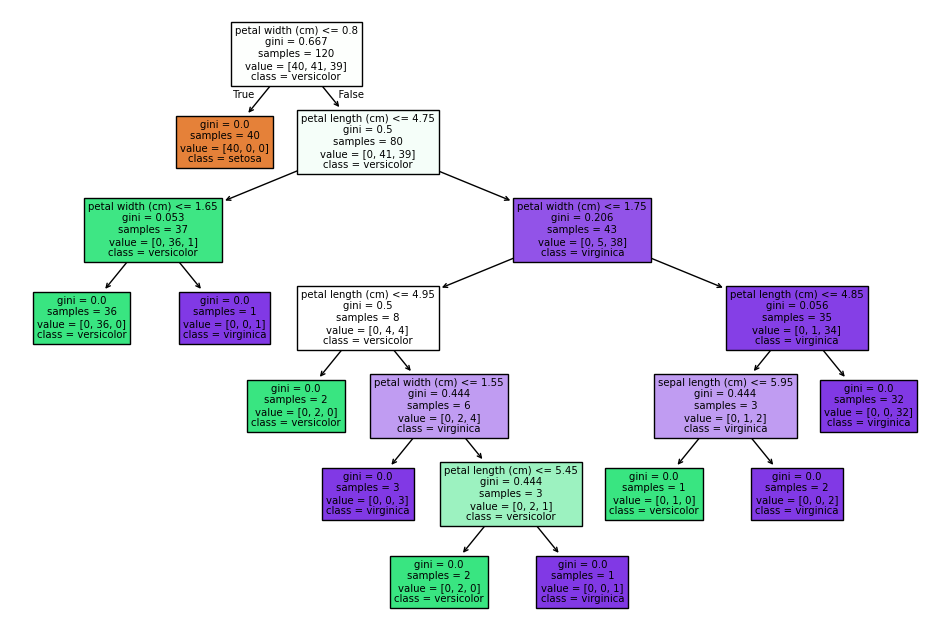

In [ ]:
# 20. Write a Python program to train a Decision Tree Classifier and visualize the tree using graphviz
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()

In [ ]:
# 21. Write a Python program to train a Decision Tree Classifier with a maximum depth of 3 and compare its accuracy with a fully grown tree

data = load_iris()
X, y = data.data, data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X, y, test_size=0.2, random_state=42)

clf_depth3 = DecisionTreeClassifier(max_depth=3)
clf_depth3.fit(X_train_iris, y_train_iris)
y_pred_depth3 = clf_depth3.predict(X_test_iris)

print("21. Max Depth 3 Accuracy:", accuracy_score(y_test_iris, y_pred_depth3))

21. Max Depth 3 Accuracy: 1.0


In [ ]:
# 22. Write a Python program to train a Decision Tree Classifier using min_samples_split=5 and compare its accuracy with a default tree

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_min_split = DecisionTreeClassifier(min_samples_split=5)
clf_min_split.fit(X_train, y_train)
print("22. min_samples_split=5 Accuracy:", accuracy_score(y_test, clf_min_split.predict(X_test)))

22. min_samples_split=5 Accuracy: 1.0


In [ ]:
# 23. Write a Python program to apply feature scaling before training a Decision Tree Classifier and compare its accuracy with unscaled data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf_scaled = DecisionTreeClassifier()
clf_scaled.fit(X_train_scaled, y_train)
print("23. Scaled Data Accuracy:", accuracy_score(y_test, clf_scaled.predict(X_test_scaled)))

23. Scaled Data Accuracy: 1.0


In [ ]:
# 24. Write a Python program to train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass classification
clf_ovr = DecisionTreeClassifier()
clf_ovr.fit(X_train, y_train)
print("24. OvR Strategy Accuracy:", accuracy_score(y_test, clf_ovr.predict(X_test)))

24. OvR Strategy Accuracy: 1.0


In [ ]:
# 25. Write a Python program to train a Decision Tree Classifier and display the feature importance scores
print("25. Feature Importances:", clf.feature_importances_)

25. Feature Importances: [0.01667014 0.         0.40593501 0.57739485]


In [ ]:
# 26. Write a Python program to train a Decision Tree Regressor with max_depth=5 and compare its performance with an unrestricted tree
regressor_depth5 = DecisionTreeRegressor(max_depth=5)
regressor_depth5.fit(X_train, y_train)
y_pred = regressor_depth5.predict(X_test)
print("26. Decision Tree Regressor (max_depth=5) MSE:", mean_squared_error(y_test, y_pred))

26. Decision Tree Regressor (max_depth=5) MSE: 0.0


In [ ]:
# 27. Write a Python program to train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and visualize its effect on accuracy
clf_pruned = DecisionTreeClassifier(ccp_alpha=0.01)
clf_pruned.fit(X_train, y_train)
print("27. Pruned Tree Accuracy:", accuracy_score(y_test, clf_pruned.predict(X_test)))

27. Pruned Tree Accuracy: 1.0


In [ ]:
# 28. Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision, Recall, and F1-Score
print("28. Classification Report:\n", classification_report(y_test, y_pred))

28. Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



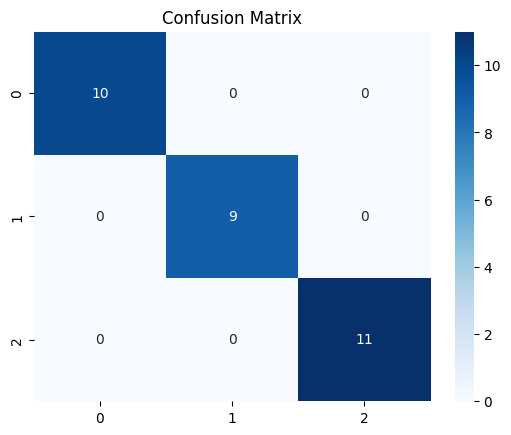

In [ ]:
# 29. Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seaborn
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# 30. Write a Python program to train a Decision Tree Classifier and use GridSearchCV to find the optimal values for max_depth and min_samples_split
param_grid = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("30. Best Parameters:", grid_search.best_params_)

30. Best Parameters: {'max_depth': 10, 'min_samples_split': 2}
